In [ ]:
!pip3 install xgboost
!pip install category_encoders
!pip3 install hyperopt
!pip3 install pdpbox

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab dataset/df_random.csv')
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,2896898,24.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.93,0.78,0.0,No,No,No,Yes,No,No
1,1521689,50.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
2,2288313,4.0,8.0,0.0,12.0,18.0,26.0,3.0,8.0,13.0,...,0.0,0.91,0.93,0.0,No,No,No,Yes,No,No
3,2870403,5.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.83,0.69,0.0,No,No,No,Yes,No,No
4,3031425,17.0,2.0,10.0,0.0,0.0,0.0,0.0,5.0,5.0,...,0.0,0.82,0.90,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1936868,73.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,...,0.0,0.91,0.77,0.0,No,No,Yes,Yes,No,No
299996,1819942,16.0,9.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,...,0.0,0.90,0.82,0.0,Yes,No,No,Yes,No,No
299997,1127004,135.0,8.0,6.0,290.0,446.0,554.0,48.0,161.0,302.0,...,0.0,0.99,0.98,0.0,No,No,No,Yes,No,No
299998,3240782,2.0,8.0,0.0,4.0,7.0,10.0,1.0,4.0,4.0,...,0.0,0.81,0.75,0.0,No,No,No,Yes,No,No


> **데이터 전처리**

In [ ]:
df = df.drop('sku', axis = 1)
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,24.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.93,0.78,0.0,No,No,No,Yes,No,No
1,50.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,38.0,...,0.0,0.99,0.96,0.0,No,No,No,Yes,No,No
2,4.0,8.0,0.0,12.0,18.0,26.0,3.0,8.0,13.0,20.0,...,0.0,0.91,0.93,0.0,No,No,No,Yes,No,No
3,5.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.83,0.69,0.0,No,No,No,Yes,No,No
4,17.0,2.0,10.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,...,0.0,0.82,0.90,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,73.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,17.0,...,0.0,0.91,0.77,0.0,No,No,Yes,Yes,No,No
299996,16.0,9.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,15.0,...,0.0,0.90,0.82,0.0,Yes,No,No,Yes,No,No
299997,135.0,8.0,6.0,290.0,446.0,554.0,48.0,161.0,302.0,560.0,...,0.0,0.99,0.98,0.0,No,No,No,Yes,No,No
299998,2.0,8.0,0.0,4.0,7.0,10.0,1.0,4.0,4.0,6.0,...,0.0,0.81,0.75,0.0,No,No,No,Yes,No,No


In [ ]:
df['deck_risk'] = df['deck_risk'].replace({'No':0, 'Yes':1})
df['oe_constraint'] = df['oe_constraint'].replace({'No':0, 'Yes':1})
df['ppap_risk'] = df['ppap_risk'].replace({'No':0, 'Yes':1})
df['stop_auto_buy'] = df['stop_auto_buy'].replace({'No':0, 'Yes':1})
df['rev_stop'] = df['rev_stop'].replace({'No':0, 'Yes':1})
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,24.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.93,0.78,0.0,0,0,0,1,0,No
1,50.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,38.0,...,0.0,0.99,0.96,0.0,0,0,0,1,0,No
2,4.0,8.0,0.0,12.0,18.0,26.0,3.0,8.0,13.0,20.0,...,0.0,0.91,0.93,0.0,0,0,0,1,0,No
3,5.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.83,0.69,0.0,0,0,0,1,0,No
4,17.0,2.0,10.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,...,0.0,0.82,0.90,0.0,1,0,0,1,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,73.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,17.0,...,0.0,0.91,0.77,0.0,0,0,1,1,0,No
299996,16.0,9.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,15.0,...,0.0,0.90,0.82,0.0,1,0,0,1,0,No
299997,135.0,8.0,6.0,290.0,446.0,554.0,48.0,161.0,302.0,560.0,...,0.0,0.99,0.98,0.0,0,0,0,1,0,No
299998,2.0,8.0,0.0,4.0,7.0,10.0,1.0,4.0,4.0,6.0,...,0.0,0.81,0.75,0.0,0,0,0,1,0,No


In [ ]:
df['risk'] = df['deck_risk'] + df['oe_constraint'] + df['ppap_risk'] + df['stop_auto_buy'] + df['rev_stop']
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,risk
0,24.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.93,0.78,0.0,0,0,0,1,0,No,1
1,50.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,38.0,...,0.99,0.96,0.0,0,0,0,1,0,No,1
2,4.0,8.0,0.0,12.0,18.0,26.0,3.0,8.0,13.0,20.0,...,0.91,0.93,0.0,0,0,0,1,0,No,1
3,5.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.83,0.69,0.0,0,0,0,1,0,No,1
4,17.0,2.0,10.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,...,0.82,0.90,0.0,1,0,0,1,0,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,73.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,17.0,...,0.91,0.77,0.0,0,0,1,1,0,No,2
299996,16.0,9.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,15.0,...,0.90,0.82,0.0,1,0,0,1,0,No,2
299997,135.0,8.0,6.0,290.0,446.0,554.0,48.0,161.0,302.0,560.0,...,0.99,0.98,0.0,0,0,0,1,0,No,1
299998,2.0,8.0,0.0,4.0,7.0,10.0,1.0,4.0,4.0,6.0,...,0.81,0.75,0.0,0,0,0,1,0,No,1


In [ ]:
dels = [col for col in df.columns if ("_risk" in col or "oe" in col or "stop" in col)]
df = df.drop(columns=dels)
df

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,went_on_backorder,risk
0,24.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.93,0.78,0.0,No,1
1,50.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,38.0,0.0,No,0.0,0.99,0.96,0.0,No,1
2,4.0,8.0,0.0,12.0,18.0,26.0,3.0,8.0,13.0,20.0,1.0,No,0.0,0.91,0.93,0.0,No,1
3,5.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,No,0.0,0.83,0.69,0.0,No,1
4,17.0,2.0,10.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,3.0,No,0.0,0.82,0.90,0.0,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,73.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,17.0,0.0,No,0.0,0.91,0.77,0.0,No,2
299996,16.0,9.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,15.0,0.0,No,0.0,0.90,0.82,0.0,No,2
299997,135.0,8.0,6.0,290.0,446.0,554.0,48.0,161.0,302.0,560.0,115.0,No,0.0,0.99,0.98,0.0,No,1
299998,2.0,8.0,0.0,4.0,7.0,10.0,1.0,4.0,4.0,6.0,0.0,No,0.0,0.81,0.75,0.0,No,1


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
national_inv,300000.0,NaN,NaN,NaN,527.988367,32034.249768,-22154.0,4.0,14.0,78.0,12324456.0
lead_time,300000.0,NaN,NaN,NaN,7.86429,7.043956,0.0,4.0,8.0,9.0,52.0
in_transit_qty,300000.0,NaN,NaN,NaN,45.202593,1324.809814,0.0,0.0,0.0,0.0,328060.0
forecast_3_month,300000.0,NaN,NaN,NaN,193.27463,5176.069358,0.0,0.0,0.0,6.0,1058396.0
forecast_6_month,300000.0,NaN,NaN,NaN,372.093163,10132.527795,0.0,0.0,0.0,15.0,2109740.0
forecast_9_month,300000.0,NaN,NaN,NaN,543.54661,14793.646201,0.0,0.0,0.0,25.0,3232820.0
sales_1_month,300000.0,NaN,NaN,NaN,59.261817,2029.696126,0.0,0.0,0.0,5.0,741762.0
sales_3_month,300000.0,NaN,NaN,NaN,182.49502,4913.970909,0.0,0.0,1.0,16.0,1058559.0
sales_6_month,300000.0,NaN,NaN,NaN,360.581763,9628.820042,0.0,0.0,3.0,33.0,2086531.0
sales_9_month,300000.0,NaN,NaN,NaN,562.486293,15513.629072,0.0,0.0,4.0,50.0,3120875.0


> **데이터 시각화**

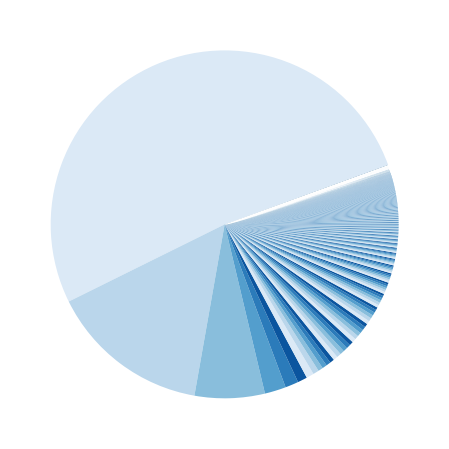

In [ ]:
fig = plt.figure(figsize=(8,8))
data = df['min_bank'].value_counts(normalize=True)
plt.pie(data, colors=sns.color_palette('Blues'), startangle=20)
# plt.savefig('pie_plot3.png', dpi=300)
plt.show();

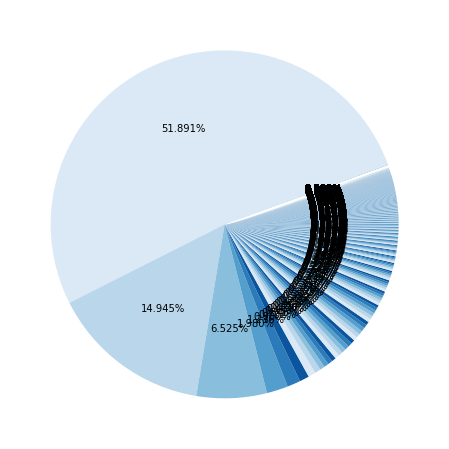

In [ ]:
fig = plt.figure(figsize=(8,8))
data = df_outlier['min_bank'].value_counts(normalize=True)
plt.pie(data, colors=sns.color_palette('Blues'), startangle=20, autopct="%.3f%%")
# plt.savefig('pie_plot3.png', dpi=300)
plt.show();

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['min_bank'], ax=ax[0])
sns.histplot(np.log1p(df['min_bank']), ax=ax[1])

> **데이터 전처리: 이상치 제거 (x)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


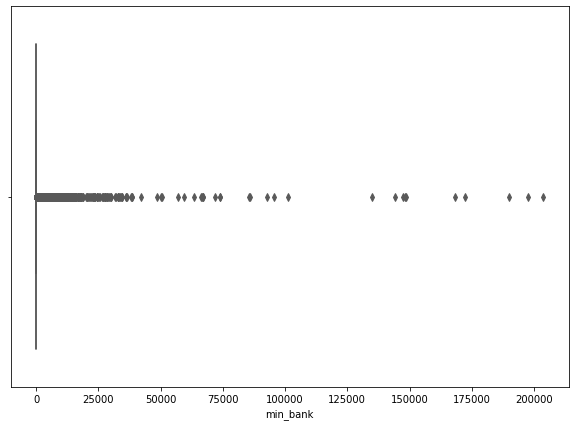

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df['min_bank'], palette='Set2')

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=df, column='min_bank', weight=1.5)
df.drop(outlier_idx, axis=0, inplace=True)

(array([498., 153.,  78.,  18.,  13.,  10.,   8.,   7.,   7.,   7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

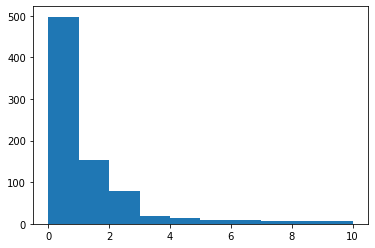

In [ ]:
plt.hist(df['min_bank'])

(array([498.,   0., 153.,   0.,  78.,  18.,  13.,  10.,  15.,  14.]),
 array([0.        , 0.23978953, 0.47957905, 0.71936858, 0.95915811,
        1.19894764, 1.43873716, 1.67852669, 1.91831622, 2.15810575,
        2.39789527]),
 <a list of 10 Patch objects>)

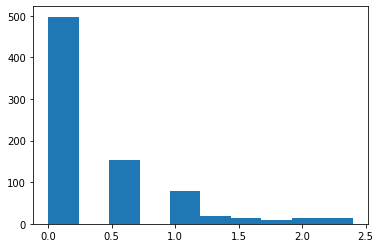

In [ ]:
plt.hist(np.log1p(df['min_bank']))

In [ ]:
df['min_bank'].describe()

count    799.000000
mean       0.854819
std        1.654779
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: min_bank, dtype: float64

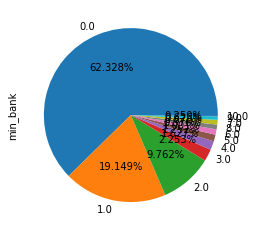

In [ ]:
df['min_bank'].value_counts(normalize=True).plot.pie(autopct="%.3f%%")

> **데이터 전처리: target 이상치 제거 (임의)**

In [ ]:
df_outlier = df.copy()
df_outlier_high = df_outlier[df_outlier['min_bank']>30000].index
df_outlier = df_outlier.drop(df_outlier_high)
df_outlier

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,risk
0,24.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.93,0.78,0.0,0,0,0,1,0,No,1
1,50.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,38.0,...,0.99,0.96,0.0,0,0,0,1,0,No,1
2,4.0,8.0,0.0,12.0,18.0,26.0,3.0,8.0,13.0,20.0,...,0.91,0.93,0.0,0,0,0,1,0,No,1
3,5.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.83,0.69,0.0,0,0,0,1,0,No,1
4,17.0,2.0,10.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,...,0.82,0.90,0.0,1,0,0,1,0,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,73.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,17.0,...,0.91,0.77,0.0,0,0,1,1,0,No,2
299996,16.0,9.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,15.0,...,0.90,0.82,0.0,1,0,0,1,0,No,2
299997,135.0,8.0,6.0,290.0,446.0,554.0,48.0,161.0,302.0,560.0,...,0.99,0.98,0.0,0,0,0,1,0,No,1
299998,2.0,8.0,0.0,4.0,7.0,10.0,1.0,4.0,4.0,6.0,...,0.81,0.75,0.0,0,0,0,1,0,No,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


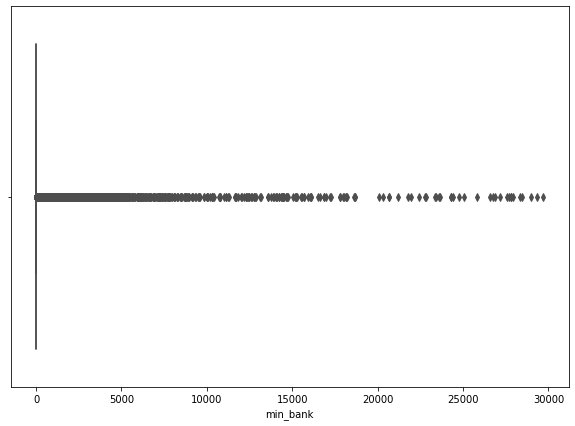

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df_outlier['min_bank'], palette='YlGnBu')

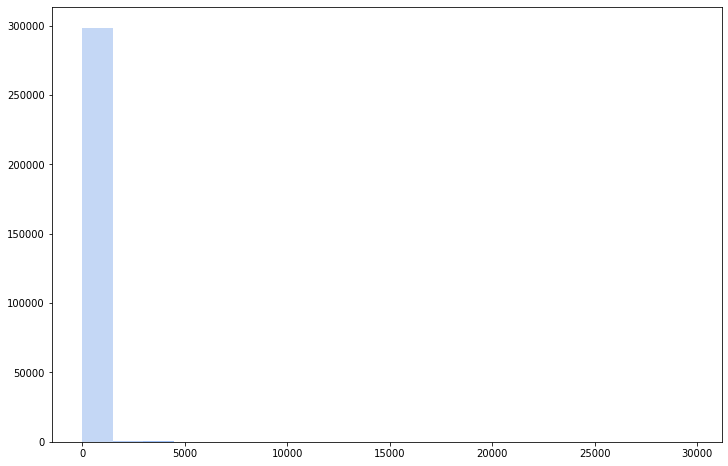

In [ ]:
import matplotlib.colors as mcl
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(12,8))
_, bins, patches = plt.hist(df_outlier['min_bank'], bins=20);

bin_centers = 0.5*(bins[:-1]+bins[1:])
col = bin_centers - min(bin_centers) 
col /= max(col)
h = 217 #31
v = 96 #97
cv = [mcl.hsv_to_rgb((h*1/(2*180),0.2,v/100)), mcl.hsv_to_rgb((h*1/(2*180),1,v/100)), mcl.hsv_to_rgb((h*1/(2*180),0.2,v/100))]
cmap=LinearSegmentedColormap.from_list('field_cmap', cv, N=256,gamma=1)
for c, p in zip(col, patches):
    plt.setp(p, "facecolor", cmap(c))
 
# plt.savefig('bar3.png', dpi=300)
plt.show()

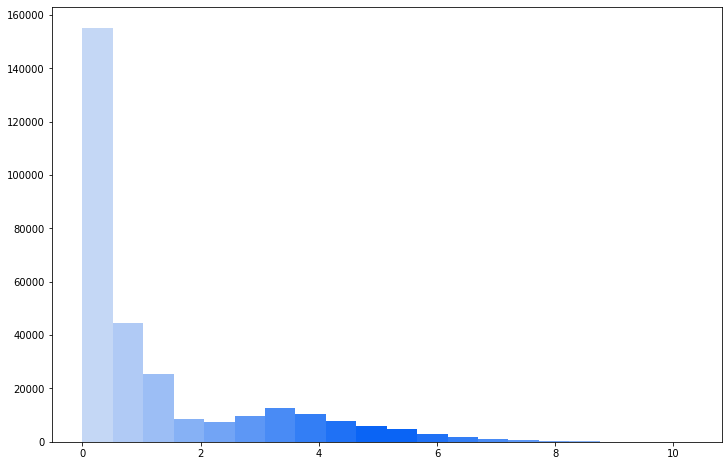

In [ ]:
plt.figure(figsize=(12,8))
_, bins, patches = plt.hist(np.log1p(df_outlier['min_bank']), bins=20);

bin_centers = 0.5*(bins[:-1]+bins[1:])
col = bin_centers - min(bin_centers) 
col /= max(col)
h = 217 #31
v = 96 #97
cv = [mcl.hsv_to_rgb((h*1/(2*180),0.2,v/100)), mcl.hsv_to_rgb((h*1/(2*180),1,v/100)), mcl.hsv_to_rgb((h*1/(2*180),0.2,v/100))]
cmap=LinearSegmentedColormap.from_list('field_cmap', cv, N=256,gamma=1)
for c, p in zip(col, patches):
    plt.setp(p, "facecolor", cmap(c))
 
# plt.savefig('bar4.png', dpi=300)
plt.show()

> **데이터 전처리: feature 이상치 제거 (임의)**

In [ ]:
df_outlier_hi = df_outlier[(df_outlier['national_inv']>50000) | (df_outlier['in_transit_qty']>20000) | (df_outlier['forecast_3_month']>50000) |
                           (df_outlier['forecast_6_month']>50000) |(df_outlier['forecast_9_month']>30000) | (df_outlier['sales_1_month']>20000) |
                           (df_outlier['sales_3_month']>50000) | (df_outlier['sales_6_month']>50000) | (df_outlier['sales_9_month']>100000) |
                           (df_outlier['pieces_past_due']>2000) | (df_outlier['local_bo_qty']>2000)].index
df_outlier = df_outlier.drop(df_outlier_hi)
df_outlier

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,risk
0,24.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.93,0.78,0.0,0,0,0,1,0,No,1
1,50.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,38.0,...,0.99,0.96,0.0,0,0,0,1,0,No,1
2,4.0,8.0,0.0,12.0,18.0,26.0,3.0,8.0,13.0,20.0,...,0.91,0.93,0.0,0,0,0,1,0,No,1
3,5.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.83,0.69,0.0,0,0,0,1,0,No,1
4,17.0,2.0,10.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,...,0.82,0.90,0.0,1,0,0,1,0,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,73.0,9.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,17.0,...,0.91,0.77,0.0,0,0,1,1,0,No,2
299996,16.0,9.0,0.0,0.0,0.0,0.0,1.0,3.0,6.0,15.0,...,0.90,0.82,0.0,1,0,0,1,0,No,2
299997,135.0,8.0,6.0,290.0,446.0,554.0,48.0,161.0,302.0,560.0,...,0.99,0.98,0.0,0,0,0,1,0,No,1
299998,2.0,8.0,0.0,4.0,7.0,10.0,1.0,4.0,4.0,6.0,...,0.81,0.75,0.0,0,0,0,1,0,No,1


> **모델링: train, val, test 나누기**

In [ ]:
from sklearn.model_selection import train_test_split

X= df_outlier.drop('min_bank', axis=1)
y= df_outlier['min_bank']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(191434, 17) (47859, 17) (59824, 17) (191434,) (47859,) (59824,)


> **데이터 전처리: 타겟 불균형 조정 (임의) (사용x)**



In [ ]:
df_out = df_outlier.copy()
df_outlier_low = df_out[df_out['min_bank']==0]
df_outlier_lw = df_out[df_out['min_bank']==1]
df_outlier_l = df_out[df_out['min_bank']==2]
df_outlier_low = df_outlier_low.sample(n=149000, random_state=42).index
df_outlier_lw = df_outlier_lw.sample(n=38500, random_state=42).index
df_outlier_l = df_outlier_l.sample(n=13500, random_state=42).index
df_out = df_out.drop(df_outlier_low)
df_out = df_out.drop(df_outlier_lw)
df_out = df_out.drop(df_outlier_l)
df_out

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,went_on_backorder,risk
4,17.0,2.0,10.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,3.0,No,0.0,0.82,0.90,0.0,No,2
11,451.0,2.0,27.0,446.0,886.0,1257.0,210.0,468.0,885.0,1376.0,177.0,No,0.0,0.98,0.99,0.0,No,1
16,2172.0,12.0,146.0,1547.0,3356.0,5010.0,596.0,1595.0,3690.0,6218.0,434.0,No,0.0,0.94,0.82,10.0,No,1
18,55.0,8.0,2.0,30.0,60.0,72.0,6.0,29.0,73.0,111.0,21.0,No,0.0,0.95,0.96,0.0,No,1
28,451.0,2.0,124.0,60.0,240.0,420.0,94.0,190.0,230.0,232.0,94.0,No,0.0,0.84,0.73,0.0,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299986,47.0,8.0,0.0,68.0,116.0,152.0,23.0,60.0,90.0,140.0,28.0,No,0.0,0.83,0.83,4.0,No,1
299991,116.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,No,0.0,1.00,0.98,0.0,No,1
299993,14.0,8.0,2.0,0.0,0.0,0.0,3.0,6.0,13.0,26.0,3.0,No,0.0,0.93,0.96,0.0,No,1
299997,135.0,8.0,6.0,290.0,446.0,554.0,48.0,161.0,302.0,560.0,115.0,No,0.0,0.99,0.98,0.0,No,1


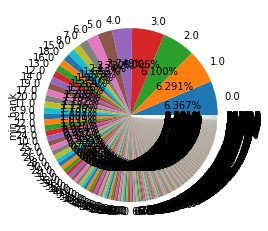

In [ ]:
df_out['min_bank'].value_counts(normalize=True).plot.pie(autopct="%.3f%%")

(array([9.4752e+04, 2.1590e+03, 7.1300e+02, 3.6100e+02, 2.2000e+02,
        1.6800e+02, 1.0700e+02, 8.3000e+01, 5.2000e+01, 4.7000e+01]),
 array([   0. ,  499.8,  999.6, 1499.4, 1999.2, 2499. , 2998.8, 3498.6,
        3998.4, 4498.2, 4998. ]),
 <a list of 10 Patch objects>)

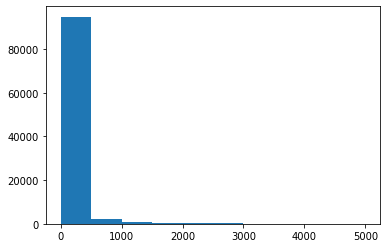

In [ ]:
plt.hist(df_out['min_bank'])

(array([12489., 15643., 10941., 19454., 16897., 11065.,  7044.,  3177.,
         1341.,   611.]),
 array([0.        , 0.85169932, 1.70339863, 2.55509795, 3.40679727,
        4.25849659, 5.1101959 , 5.96189522, 6.81359454, 7.66529385,
        8.51699317]),
 <a list of 10 Patch objects>)

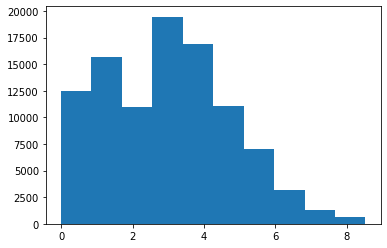

In [ ]:
plt.hist(np.log1p(df_out['min_bank']))

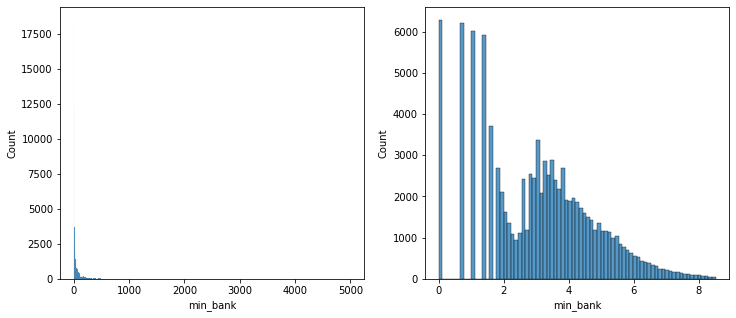

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_out['min_bank'], ax=ax[0])
sns.histplot(np.log1p(df_out['min_bank']), ax=ax[1])

> **모델링: 기준모델**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

base= y_train.mean()
baseline = [base] * len(y_train)

baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 49.51287767965944


> **모델링1: XGBRegressor**

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

In [ ]:
pipe= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    XGBRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        learning_rate=0.1,
        colsample_bytree=0.7,
        max_depth=7,
        min_child_weight=10,
        scale_pos_weight=3
    ),
)
print(pipe)

pipe.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbregressor',
                 XGBRegressor(colsample_bytree=0.7, max_depth=7,
                              min_child_weight=10, n_estimators=200, n_jobs=-1,
                              random_state=42, scale_pos_weight=3))])
[15:16:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['potential_issue', 'went_on_backorder'],
                                mapping=[{'col': 'potential_issue',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                                         {'col': 'went_on_backorder',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbregressor',
                 XGBRegressor(colsample_bytree=0.7, max_depth=7,
                              min_child_weight=10, n_estimators=200, n_jobs=-1,
                              random_state=42, scale_pos_weight=3))])

In [ ]:
y_pred_train= pipe.predict(X_train)
y_pred_val= pipe.predict(X_val)
y_pred_test= pipe.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def eval_models(y_pred, y_real) :
    mse= mean_squared_error(y_real, y_pred)
    rmse= np.sqrt(mse)
    mae= mean_absolute_error(y_real, y_pred)
    r2= r2_score(y_real, y_pred)

    return mse, rmse, mae, r2

In [ ]:
base_mse, base_rmse, base_mae, base_r2= eval_models(baseline, y_train)
train_mse, train_rmse, train_mae, train_r2= eval_models(y_pred_train, y_train)
val_mse, val_rmse, val_mae, val_r2= eval_models(y_pred_val, y_val)
test_mse, test_rmse, test_mae, test_r2= eval_models(y_pred_test, y_test)

In [ ]:
comparison_metrics= pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base','Train', 'Val', 'Test'])
comparison_metrics['Base']= [base_mse, base_rmse, base_mae, base_r2 ]
comparison_metrics['Train']= [train_mse, train_rmse, train_mae, train_r2]
comparison_metrics['Val']= [val_mse, val_rmse, val_mae, val_r2]
comparison_metrics['Test']= [test_mse, test_rmse, test_mae, test_r2]
comparison_metrics

,Base,Train,Val,Test
mse,40660.402639,4643.703682,10075.014790,9491.734668
rmse,201.644248,68.144726,100.374373,97.425534
mae,49.512878,10.973784,13.419017,12.869319
r2,0.000000,0.885793,0.646914,0.652777


> **모델링1: XGBRegressor / Randomized Search (하이퍼파라미터 튜닝1)**

In [ ]:
pipe_h= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="median"),
    XGBRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        learning_rate=0.1,
    ),
)
print(pipe)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['potential_issue', 'went_on_backorder'],
                                mapping=[{'col': 'potential_issue',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                                         {'col': 'went_on_backorder',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('xgbregressor',
                 XGBRegressor(colsample_bytree=0.78, max_depth=8,
                              min_child_weight=10, n_estimators=200, n_jobs=-1,
                              random_state=42, scale_pos_weight=3))])


In [ ]:
from scipy.stats.distributions import uniform

params= {
    "simpleimputer__strategy": ["median", "mean"],
    "xgbregressor__max_depth": [2, 4, 6, 8],
    "xgbregressor__min_child_weight": [2, 4, 6, 8],
    "xgbregressor__colsample_bytree": uniform(
        loc=0.5, scale=0.5
    )}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search= RandomizedSearchCV(
    pipe_h,
    param_distributions=params,
    scoring="accuracy",
    n_iter=10,
    cv=3,
    verbose=3,
    random_state=42,
)
randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[07:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 1/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.8982714934301164, xgbregressor__max_depth=6, xgbregressor__min_child_weight=6;, score=nan total time=  29.5s
[07:36:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 2/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.8982714934301164, xgbregressor__max_depth=6, xgbregressor__min_child_weight=6;, score=nan total time=  28.9s
[07:37:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 3/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.8982714934301164, xgbregressor__max_depth=6, xgbregressor__min_child_weight=6;, score=nan total time=  22.2s
[07:37:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 1/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.7993292420985183, xgbregressor__max_depth=6, xgbregressor__min_child_weight=4;, score=nan total time=  20.8s
[07:37:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 2/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.7993292420985183, xgbregressor__max_depth=6, xgbregressor__min_child_weight=4;, score=nan total time=  22.7s
[07:38:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 3/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.7993292420985183, xgbregressor__max_depth=6, xgbregressor__min_child_weight=4;, score=nan total time=  21.2s
[07:38:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 1/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.5499874579090014, xgbregressor__max_depth=6, xgbregressor__min_child_weight=8;, score=nan total time=  16.7s
[07:38:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 2/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.5499874579090014, xgbregressor__max_depth=6, xgbregressor__min_child_weight=8;, score=nan total time=  16.8s
[07:39:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 3/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.5499874579090014, xgbregressor__max_depth=6, xgbregressor__min_child_weight=8;, score=nan total time=  16.6s
[07:39:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 1/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.8005575058716043, xgbregressor__max_depth=8, xgbregressor__min_child_weight=6;, score=nan total time=  28.2s
[07:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 2/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.8005575058716043, xgbregressor__max_depth=8, xgbregressor__min_child_weight=6;, score=nan total time=  27.3s
[07:40:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 3/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.8005575058716043, xgbregressor__max_depth=8, xgbregressor__min_child_weight=6;, score=nan total time=  26.0s
[07:40:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 1/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.5282057895135501, xgbregressor__max_depth=8, xgbregressor__min_child_weight=8;, score=nan total time=  20.2s
[07:41:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 2/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.5282057895135501, xgbregressor__max_depth=8, xgbregressor__min_child_weight=8;, score=nan total time=  19.5s
[07:41:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 3/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.5282057895135501, xgbregressor__max_depth=8, xgbregressor__min_child_weight=8;, score=nan total time=  19.4s
[07:41:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 1/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.6061695553391381, xgbregressor__max_depth=8, xgbregressor__min_child_weight=8;, score=nan total time=  21.8s
[07:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 2/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.6061695553391381, xgbregressor__max_depth=8, xgbregressor__min_child_weight=8;, score=nan total time=  21.9s
[07:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 3/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.6061695553391381, xgbregressor__max_depth=8, xgbregressor__min_child_weight=8;, score=nan total time=  21.8s
[07:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 1/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.8087407548138583, xgbregressor__max_depth=4, xgbregressor__min_child_weight=4;, score=nan total time=  17.8s
[07:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 2/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.8087407548138583, xgbregressor__max_depth=4, xgbregressor__min_child_weight=4;, score=nan total time=  15.3s
[07:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 3/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.8087407548138583, xgbregressor__max_depth=4, xgbregressor__min_child_weight=4;, score=nan total time=  15.4s
[07:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 1/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.7159725093210578, xgbregressor__max_depth=2, xgbregressor__min_child_weight=6;, score=nan total time=   9.5s
[07:43:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 2/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.7159725093210578, xgbregressor__max_depth=2, xgbregressor__min_child_weight=6;, score=nan total time=   9.5s
[07:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 3/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.7159725093210578, xgbregressor__max_depth=2, xgbregressor__min_child_weight=6;, score=nan total time=   9.4s
[07:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 1/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.6999304858576277, xgbregressor__max_depth=8, xgbregressor__min_child_weight=8;, score=nan total time=  23.3s
[07:44:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 2/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.6999304858576277, xgbregressor__max_depth=8, xgbregressor__min_child_weight=8;, score=nan total time=  23.5s
[07:44:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 3/3] END simpleimputer__strategy=median, xgbregressor__colsample_bytree=0.6999304858576277, xgbregressor__max_depth=8, xgbregressor__min_child_weight=8;, score=nan total time=  23.4s
[07:45:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 1/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.6831809216468459, xgbregressor__max_depth=4, xgbregressor__min_child_weight=4;, score=nan total time=  14.1s
[07:45:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 2/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.6831809216468459, xgbregressor__max_depth=4, xgbregressor__min_child_weight=4;, score=nan total time=  13.9s
[07:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
    type_true, type_pred


[CV 3/3] END simpleimputer__strategy=mean, xgbregressor__colsample_bytree=0.6831809216468459, xgbregressor__max_depth=4, xgbregressor__min_child_weight=4;, score=nan total time=  13.8s
[07:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer',
                                              SimpleImputer(strategy='median')),
                                             ('xgbregressor',
                                              XGBRegressor(n_estimators=200,
                                                           n_jobs=-1,
                                                           random_state=42))]),
                   param_distributions={'simpleimputer__strategy': ['median',
                                                                    'mean'],
                                        'xgbregressor__colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7a4449c710>,
                                        'xgbregressor__max_depth': [2, 4, 6, 8],
                               

In [ ]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'simpleimputer__strategy': 'median', 'xgbregressor__colsample_bytree': 0.8982714934301164, 'xgbregressor__max_depth': 6, 'xgbregressor__min_child_weight': 6}
최적 AUC:  nan


> **모델링1: XGBRegressor / Bayesian Search (하이퍼파라미터 튜닝2)**

In [ ]:
from hyperopt import hp

params= {
    "simpleimputer__strategy": hp.choice("strategy", ["median", "mean"]),
    "xgbregressor__max_depth": hp.quniform("max_depth", 2, 6, 1),
    "xgbregressor__min_child_weight": hp.quniform("min_child_weight", 9, 11, 1),
    "xgbregressor__colsample_bytree": hp.quniform("colsample_bytree", 0.7, 0.9, 0.1),
    "xgbregressor__scale_pos_weight" : hp.quniform("scale_pos_weight", 2, 6, 1)
}

In [ ]:
from hyperopt import fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
import numpy as np

def get_pipe(params):
    params["xgbregressor__max_depth"]= int(
        params["xgbregressor__max_depth"]
    ) # max_depth는 정수형으로 변환
    pipe_h2= make_pipeline(
        OrdinalEncoder(),
        SimpleImputer(),
        XGBRegressor(
            n_estimators=200,
            random_state=42,
            n_jobs=-1,
            learning_rate=0.1,
            use_label_encoder=False,
        ),
    )
    pipe_h2= pipe_h2.set_params(**params)
    return pipe_h2


def fit_and_eval(params):
    pipe_h2= get_pipe(params)
    neg_mse_scores= cross_val_score(pipe_h2, X_train, y_train, cv=3, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_cv_score= np.mean(rmse_scores)
    # roc_auc는 클수록 좋은 metric이므로, hyperopt.fmin이 roc_auc를 최대화하도록 하기 위해 -부호를 붙여 반환
    return {"loss":-avg_cv_score, "status": STATUS_OK}


trials= (
    Trials()
) # Trials() 객체를 fmin에 함께 넣어 실행하면, 실행되는 매 fit의 학습 정보 및 학습 결과가 해당 객체에 모두 저장

best_params= fmin(
    fn=fit_and_eval, trials=trials, space=params, algo=tpe.suggest, max_evals=10
) # max_evals 횟수만큼 하이퍼파라미터 조합을 탐색합니다.

[08:24:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:26:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
print("최적 하이퍼파라미터: ", trials.best_trial["misc"]["vals"])
print("최적 RMSE: ",-trials.best_trial["result"]["loss"])

최적 하이퍼파라미터:  {'colsample_bytree': [0.8], 'max_depth': [2.0], 'min_child_weight': [11.0], 'scale_pos_weight': [3.0], 'strategy': [1]}
최적 RMSE:  132.19732929928273


> **모델링1: XGBRegressor / 특성중요도**

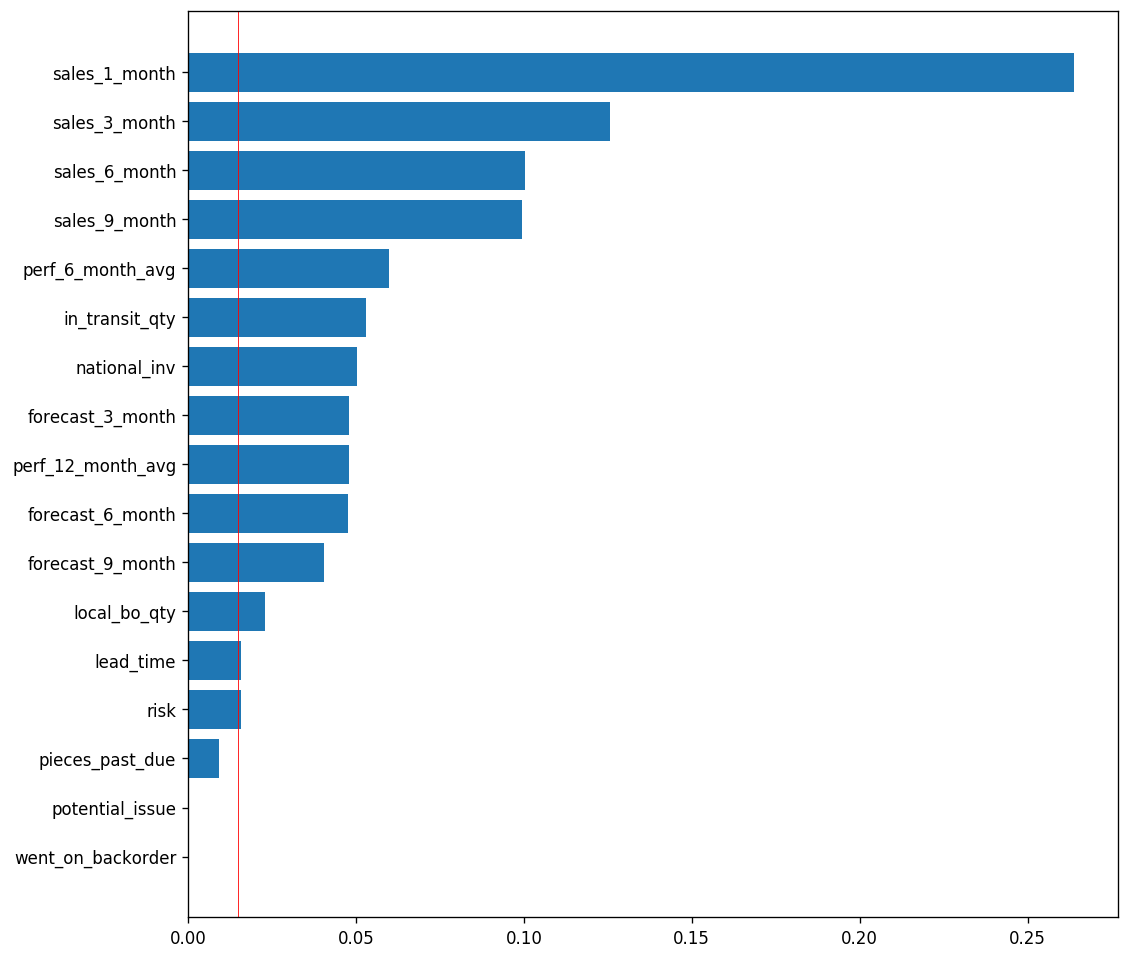

In [ ]:
import matplotlib.pyplot as plt

feature_importances= list(
    zip(X_train.columns, pipe.named_steps["xgbregressor"].feature_importances_)
)
feature_importances= sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.015, color="red", linewidth=0.5)
# plt.savefig('importance.png', dpi=300)
plt.show();

> **모델링1: XGBRegressor + log**



In [ ]:
from sklearn.compose import TransformedTargetRegressor

trans_target_reg = TransformedTargetRegressor(
    regressor=pipe, func=np.log1p, inverse_func=np.expm1
)

trans_target_reg.fit(X_train, y_train)

[08:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('ordinalencoder',
                                                      OrdinalEncoder(cols=['potential_issue',
                                                                           'went_on_backorder'],
                                                                     mapping=[{'col': 'potential_issue',
                                                                               'data_type': dtype('O'),
                                                                               'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                                                                              {'col': 'went_on_backorder',
                                                                               'data_type': dtype('O'),
                                                                               'mapping': No     1
Yes    

In [ ]:
y_p_train= trans_target_reg.predict(X_train)
y_p_val= trans_target_reg.predict(X_val)
y_p_test= trans_target_reg.predict(X_test)

In [ ]:
base_mse, base_rmse, base_mae, base_r2= eval_models(baseline, y_train)
train_mse, train_rmse, train_mae, train_r2= eval_models(y_p_train, y_train)
val_mse, val_rmse, val_mae, val_r2= eval_models(y_p_val, y_val)
test_mse, test_rmse, test_mae, test_r2= eval_models(y_p_test, y_test)

In [ ]:
comparison_metrics= pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base','Train', 'Val', 'Test'])
comparison_metrics['Base']= [base_mse, base_rmse, base_mae, base_r2 ]
comparison_metrics['Train']= [train_mse, train_rmse, train_mae, train_r2]
comparison_metrics['Val']= [val_mse, val_rmse, val_mae, val_r2]
comparison_metrics['Test']= [test_mse, test_rmse, test_mae, test_r2]
comparison_metrics

,Base,Train,Val,Test
mse,40660.402639,10292.160384,8124.084702,9408.597317
rmse,201.644248,101.450285,90.133705,96.997924
mae,49.512878,10.235903,11.349880,11.174822
r2,0.000000,0.746875,0.715285,0.655819


> **모델링2 : Randomforest**



In [ ]:
from sklearn.ensemble import RandomForestRegressor

pipe_rf= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    RandomForestRegressor(random_state=42, 
                          oob_score=True, 
                          n_jobs=-1, 
                          min_samples_split=2,
                          min_samples_leaf=1,
                          max_depth=5),
)

pipe_rf.fit(X_train, y_train)

print("훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("검증 정확도: ", pipe_rf.score(X_val, y_val))

훈련 정확도:  0.7579000983019453
검증 정확도:  0.6886106908529676


In [ ]:
# out-of-bag sample을 이용하여 oob_score 구하기
pipe_rf.named_steps["randomforestregressor"].oob_score_

0.5724993192853312

In [ ]:
y_pred_rf_train= pipe_rf.predict(X_train)
y_pred_rf_val= pipe_rf.predict(X_val)
y_pred_rf_test= pipe_rf.predict(X_test)

In [ ]:
base_mse, base_rmse, base_mae, base_r2= eval_models(baseline, y_train)
train_mse, train_rmse, train_mae, train_r2= eval_models(y_pred_rf_train, y_train)
val_mse, val_rmse, val_mae, val_r2= eval_models(y_pred_rf_val, y_val)
test_mse, test_rmse, test_mae, test_r2= eval_models(y_pred_rf_test, y_test)

In [ ]:
comparison_metrics= pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base','Train', 'Val', 'Test'])
comparison_metrics['Base']= [base_mse, base_rmse, base_mae, base_r2 ]
comparison_metrics['Train']= [train_mse, train_rmse, train_mae, train_r2]
comparison_metrics['Val']= [val_mse, val_rmse, val_mae, val_r2]
comparison_metrics['Test']= [test_mse, test_rmse, test_mae, test_r2]
comparison_metrics

,Base,Train,Val,Test
mse,40660.402639,9843.879482,8885.227346,12709.772042
rmse,201.644248,99.216327,94.261484,112.737625
mae,49.512878,15.435670,15.256969,15.428750
r2,0.000000,0.757900,0.688611,0.535057


> **모델링2: Randomforest / Randomized Search (하이퍼파라미터 튜닝1)**

In [ ]:
from scipy.stats.distributions import uniform

params= {
    "simpleimputer__strategy": ["median", "mean"],
    "randomforestregressor__max_depth": [4, 5, 6],
    "randomforestregressor__min_samples_split": [2, 3, 4],
    "randomforestregressor__min_samples_leaf": [1, 2, 3],
    # "randomforestregressor__scale_pos_weight" : [2, 3, 4]
    }

In [ ]:
pipe_rf_h= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(random_state=42, oob_score=True, n_jobs=-1, n_estimators=200),
)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search= RandomizedSearchCV(
    pipe_rf_h,
    param_distributions=params,
    scoring="neg_mean_squared_error",
    n_iter=10,
    cv=3,
    verbose=3,
    random_state=42,
)
randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END randomforestregressor__max_depth=5, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, simpleimputer__strategy=mean;, score=-76177.037 total time=  37.9s
[CV 2/3] END randomforestregressor__max_depth=5, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, simpleimputer__strategy=mean;, score=-184257.421 total time=  36.6s
[CV 3/3] END randomforestregressor__max_depth=5, randomforestregressor__min_samples_leaf=1, randomforestregressor__min_samples_split=2, simpleimputer__strategy=mean;, score=-456537.243 total time=  36.9s
[CV 1/3] END randomforestregressor__max_depth=6, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_samples_split=2, simpleimputer__strategy=mean;, score=-124389.441 total time=  44.8s
[CV 2/3] END randomforestregressor__max_depth=6, randomforestregressor__min_samples_leaf=3, randomforestregressor__min_sampl

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('simpleimputer', SimpleImputer()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_estimators=200,
                                                                    n_jobs=-1,
                                                                    oob_score=True,
                                                                    random_state=42))]),
                   param_distributions={'randomforestregressor__max_depth': [4,
                                                                             5,
                                                                             6],
                                        'randomforestregressor__min_samples_leaf': [1,
                            

In [ ]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'simpleimputer__strategy': 'mean', 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__max_depth': 5}
최적 AUC:  -238990.56709570787


> **모델링2: Randomforest / 특성중요도**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

model_rf= pipe_rf.named_steps['randomforestregressor']
importances= pd.Series(model_rf.feature_importances_, X_train.columns)

plt.figure(figsize=(10, 20))
importances.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show();

X_train.nunique().sort_values().plot.barh()
plt.title("Cardinailty")

> **모델링2: Randomforest + log**

In [ ]:
from sklearn.compose import TransformedTargetRegressor

trans_target_reg = TransformedTargetRegressor(
    regressor=pipe_rf, func=np.log1p, inverse_func=np.expm1
)

trans_target_reg.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('ordinalencoder',
                                                      OrdinalEncoder(cols=['potential_issue',
                                                                           'went_on_backorder'],
                                                                     mapping=[{'col': 'potential_issue',
                                                                               'data_type': dtype('O'),
                                                                               'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                                                                              {'col': 'went_on_backorder',
                                                                               'data_type': dtype('O'),
                                                                               'mapping': No     1
Yes    

In [ ]:
y_p_rf_train= trans_target_reg.predict(X_train)
y_p_rf_val= trans_target_reg.predict(X_val)
y_p_rf_test= trans_target_reg.predict(X_test)

In [ ]:
base_mse, base_rmse, base_mae, base_r2= eval_models(baseline, y_train)
train_mse, train_rmse, train_mae, train_r2= eval_models(y_p_rf_train, y_train)
val_mse, val_rmse, val_mae, val_r2= eval_models(y_p_rf_val, y_val)
test_mse, test_rmse, test_mae, test_r2= eval_models(y_p_rf_test, y_test)

In [ ]:
comparison_metrics= pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base','Train', 'Val', 'Test'])
comparison_metrics['Base']= [base_mse, base_rmse, base_mae, base_r2 ]
comparison_metrics['Train']= [train_mse, train_rmse, train_mae, train_r2]
comparison_metrics['Val']= [val_mse, val_rmse, val_mae, val_r2]
comparison_metrics['Test']= [test_mse, test_rmse, test_mae, test_r2]
comparison_metrics

,Base,Train,Val,Test
mse,48345.525802,21860.777434,17127.337781,37125.669678
rmse,219.876160,147.853906,130.871455,192.680226
mae,53.554905,14.595655,14.858166,15.933393
r2,0.000000,0.547822,0.605737,0.462478


> **모델링3: DicisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

pipe_dt= make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    DecisionTreeRegressor(random_state=42,
                          min_samples_split=2,
                          min_samples_leaf=1,
                          max_depth=5),
)
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['potential_issue', 'went_on_backorder'],
                                mapping=[{'col': 'potential_issue',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64},
                                         {'col': 'went_on_backorder',
                                          'data_type': dtype('O'),
                                          'mapping': No     1
Yes    2
NaN   -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [ ]:
y_pred_dt_train= pipe_dt.predict(X_train)
y_pred_dt_val= pipe_dt.predict(X_val)
y_pred_dt_test= pipe_dt.predict(X_test)

In [ ]:
base_mse, base_rmse, base_mae, base_r2= eval_models(baseline, y_train)
train_mse, train_rmse, train_mae, train_r2= eval_models(y_pred_dt_train, y_train)
val_mse, val_rmse, val_mae, val_r2= eval_models(y_pred_dt_val, y_val)
test_mse, test_rmse, test_mae, test_r2= eval_models(y_pred_dt_test, y_test)

In [ ]:
comparison_metrics= pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base','Train', 'Val', 'Test'])
comparison_metrics['Base']= [base_mse, base_rmse, base_mae, base_r2 ]
comparison_metrics['Train']= [train_mse, train_rmse, train_mae, train_r2]
comparison_metrics['Val']= [val_mse, val_rmse, val_mae, val_r2]
comparison_metrics['Test']= [test_mse, test_rmse, test_mae, test_r2]
comparison_metrics

,Base,Train,Val,Test
mse,40660.402639,10608.861647,10017.717518,24847.784950
rmse,201.644248,102.999328,100.088548,157.631802
mae,49.512878,17.480544,17.570759,17.894756
r2,0.000000,0.739086,0.648922,0.091029


> **모델 해석: PDP**

In [ ]:
df_outlier.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,went_on_backorder,risk
0,24.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.93,0.78,0.0,No,1
1,50.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,38.0,0.0,No,0.0,0.99,0.96,0.0,No,1
2,4.0,8.0,0.0,12.0,18.0,26.0,3.0,8.0,13.0,20.0,1.0,No,0.0,0.91,0.93,0.0,No,1
3,5.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,No,0.0,0.83,0.69,0.0,No,1
4,17.0,2.0,10.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,3.0,No,0.0,0.82,0.90,0.0,No,2


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 144

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6c996be350>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6c996bec50>})

<Figure size 864x576 with 0 Axes>

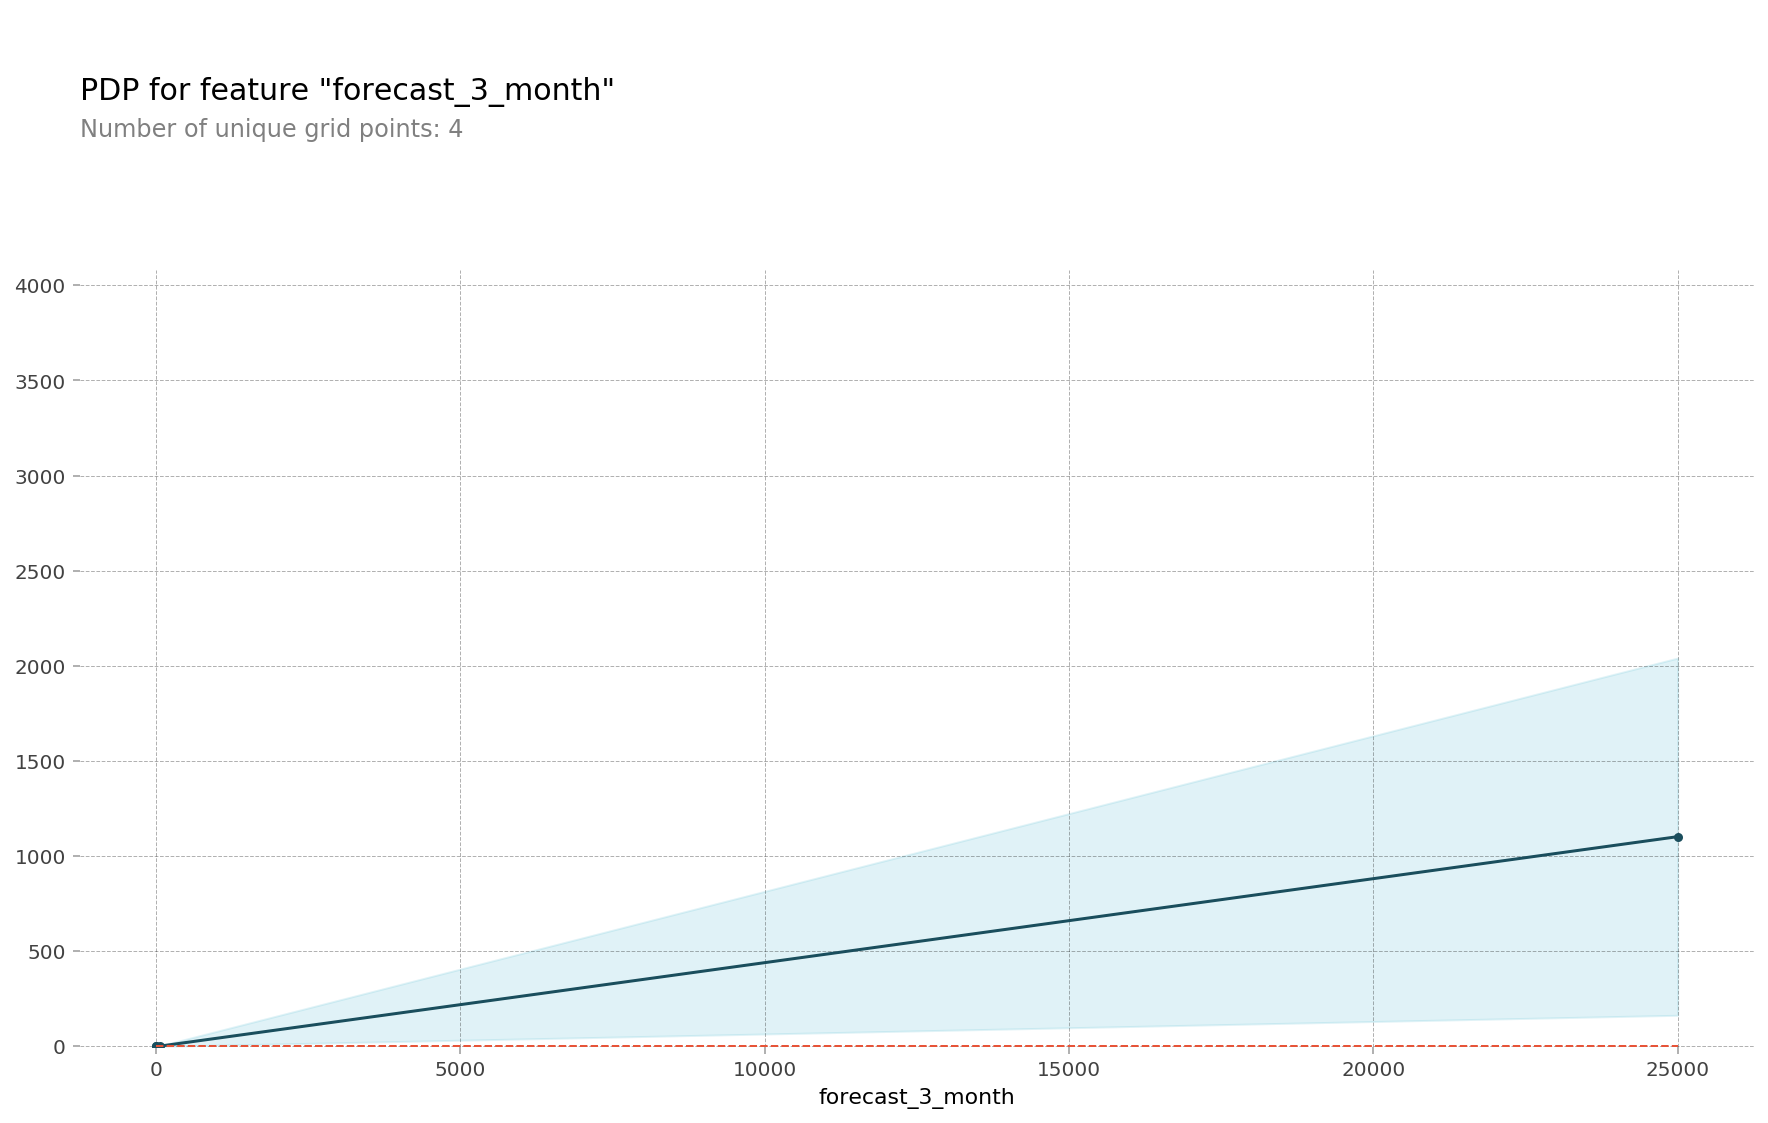

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = "forecast_3_month"

isolated = pdp_isolate(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6c99583750>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6c994c36d0>})

<Figure size 864x576 with 0 Axes>

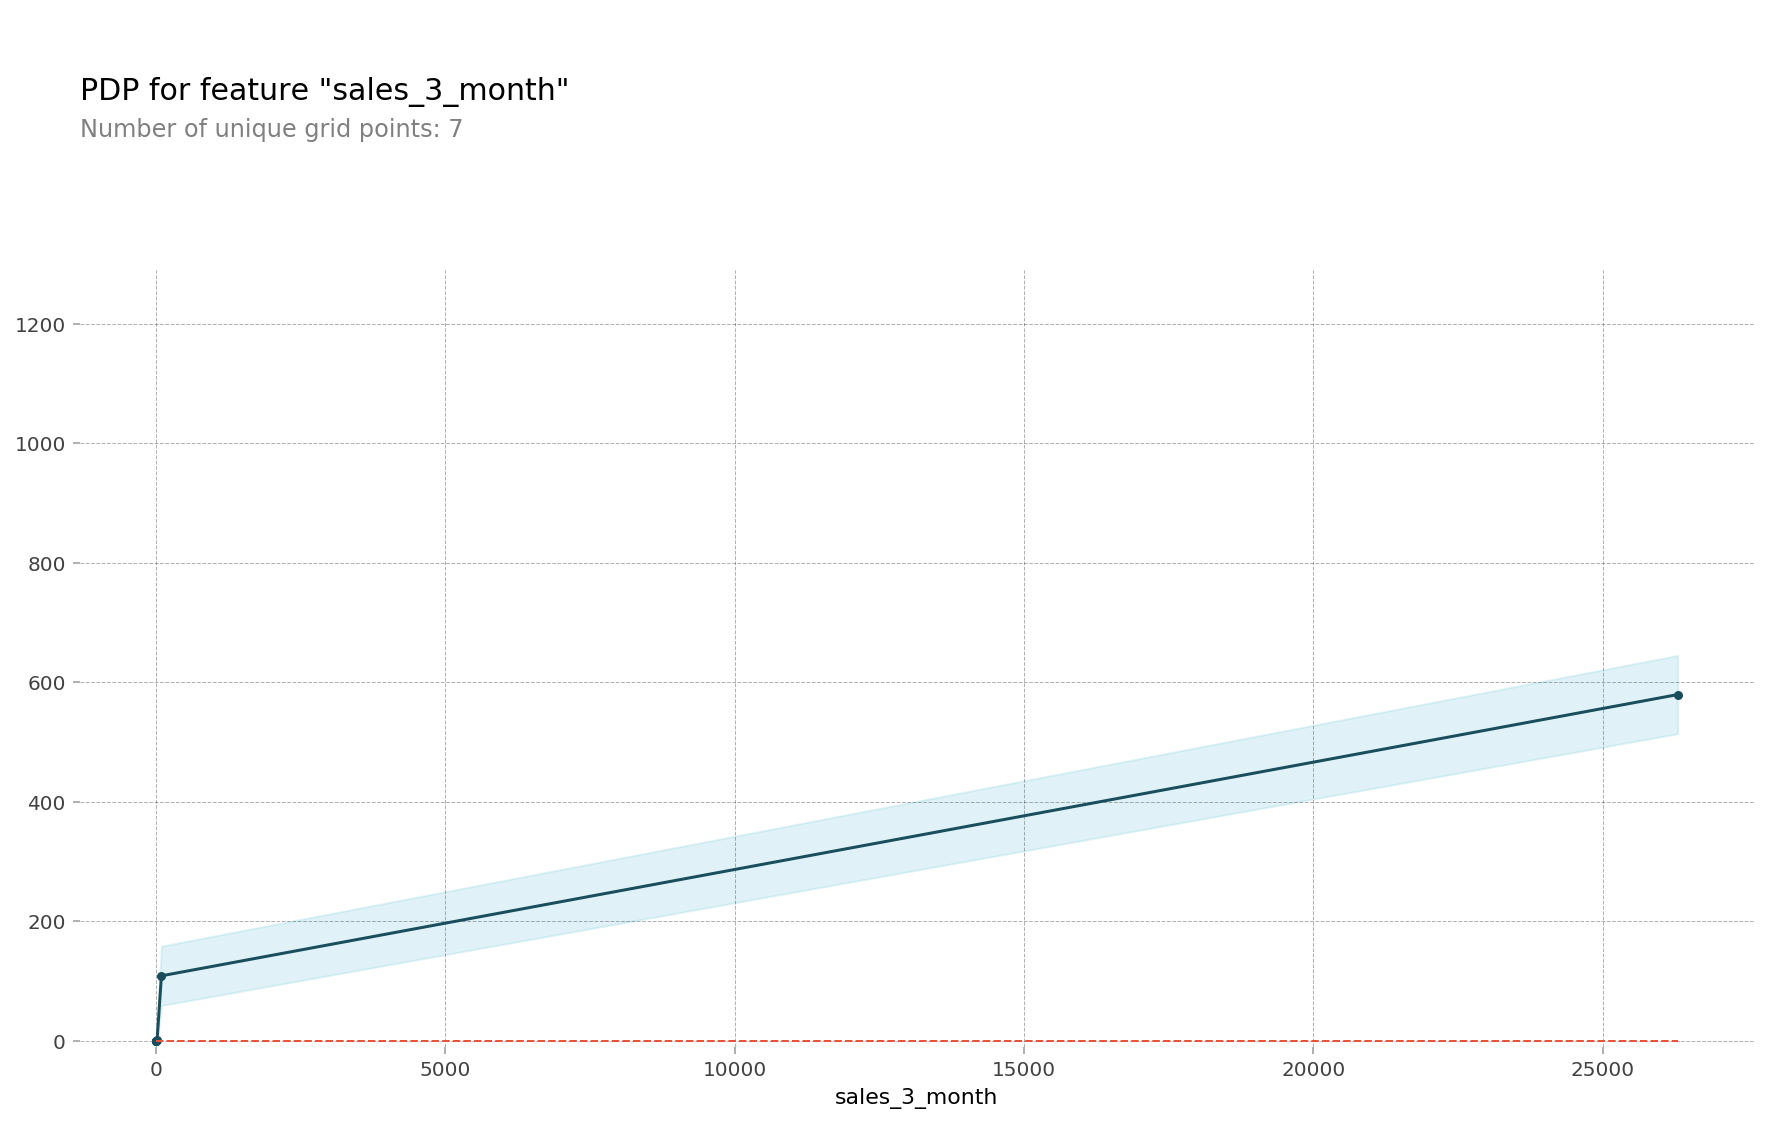

In [ ]:
target_feature = "sales_3_month"

isolated = pdp_isolate(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5b7e56e10>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5b7e50790>})

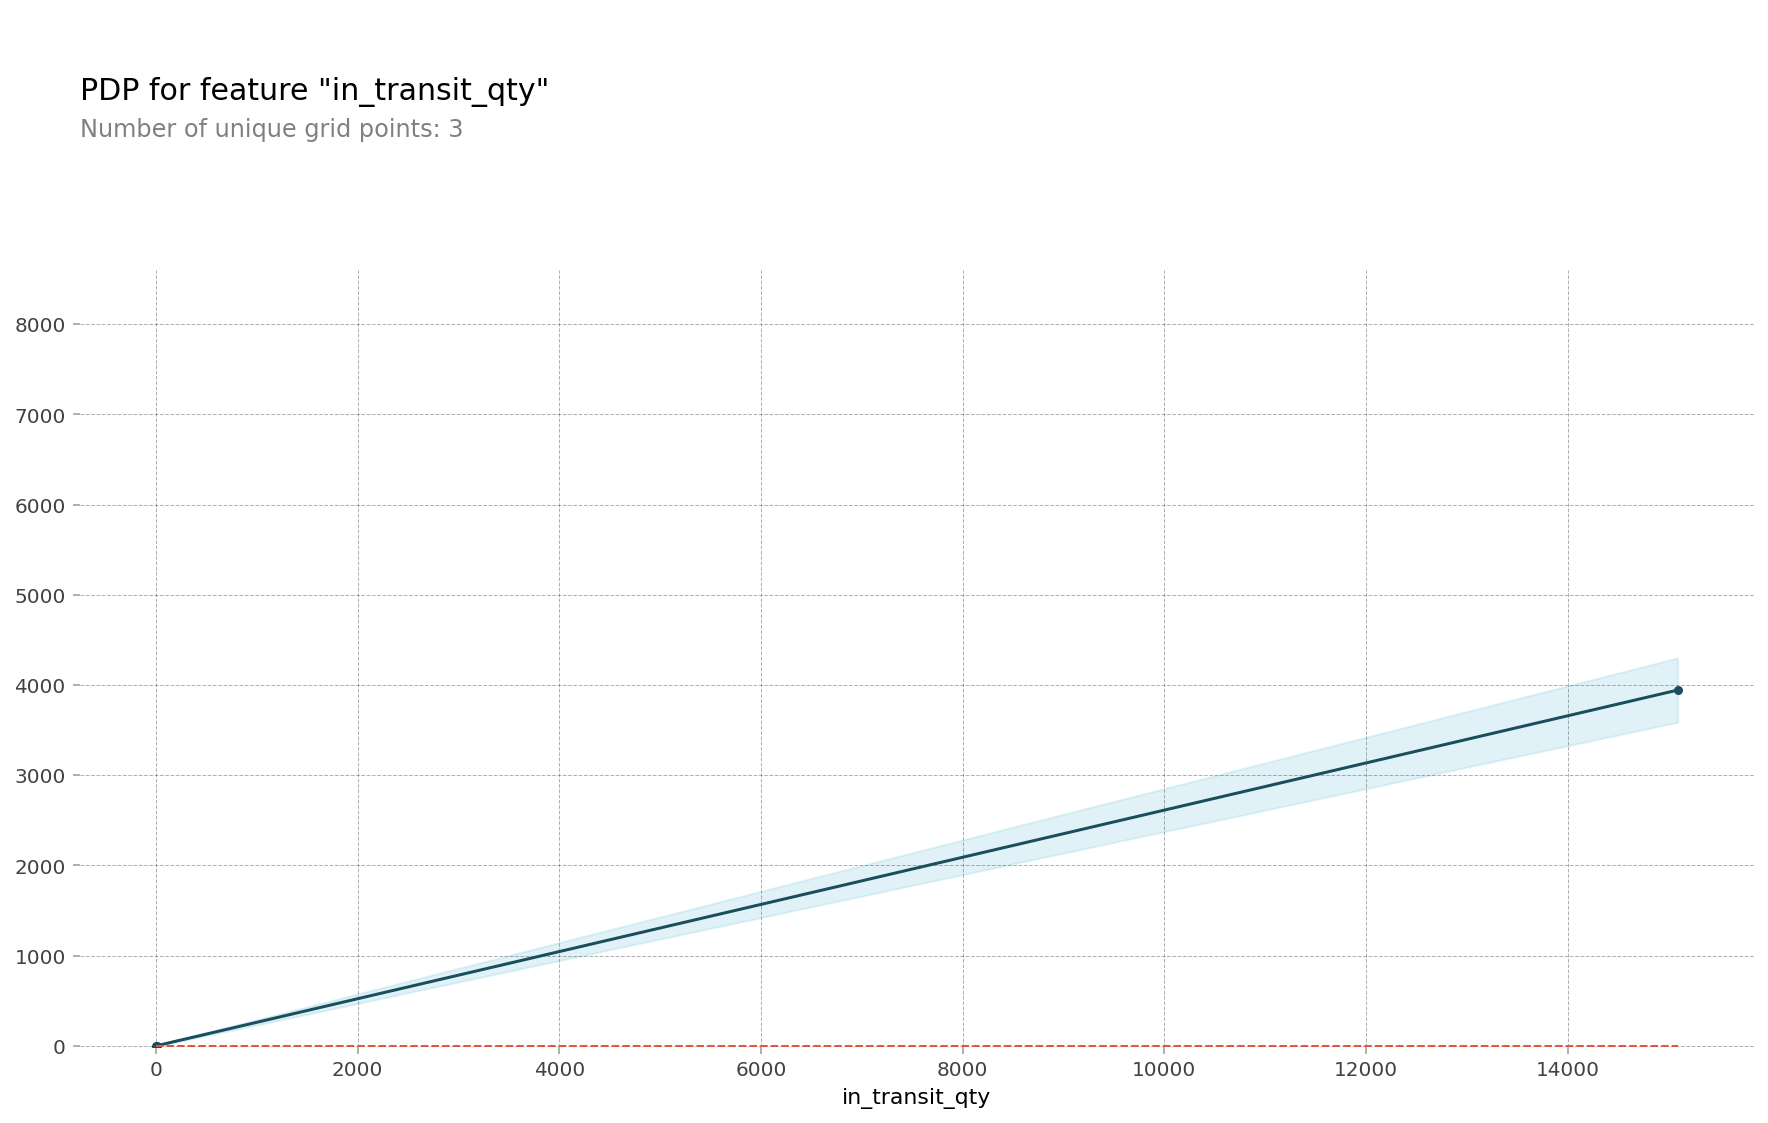

In [ ]:
target_feature = "in_transit_qty"

isolated = pdp_isolate(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5b803a410>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5b7e2df10>})

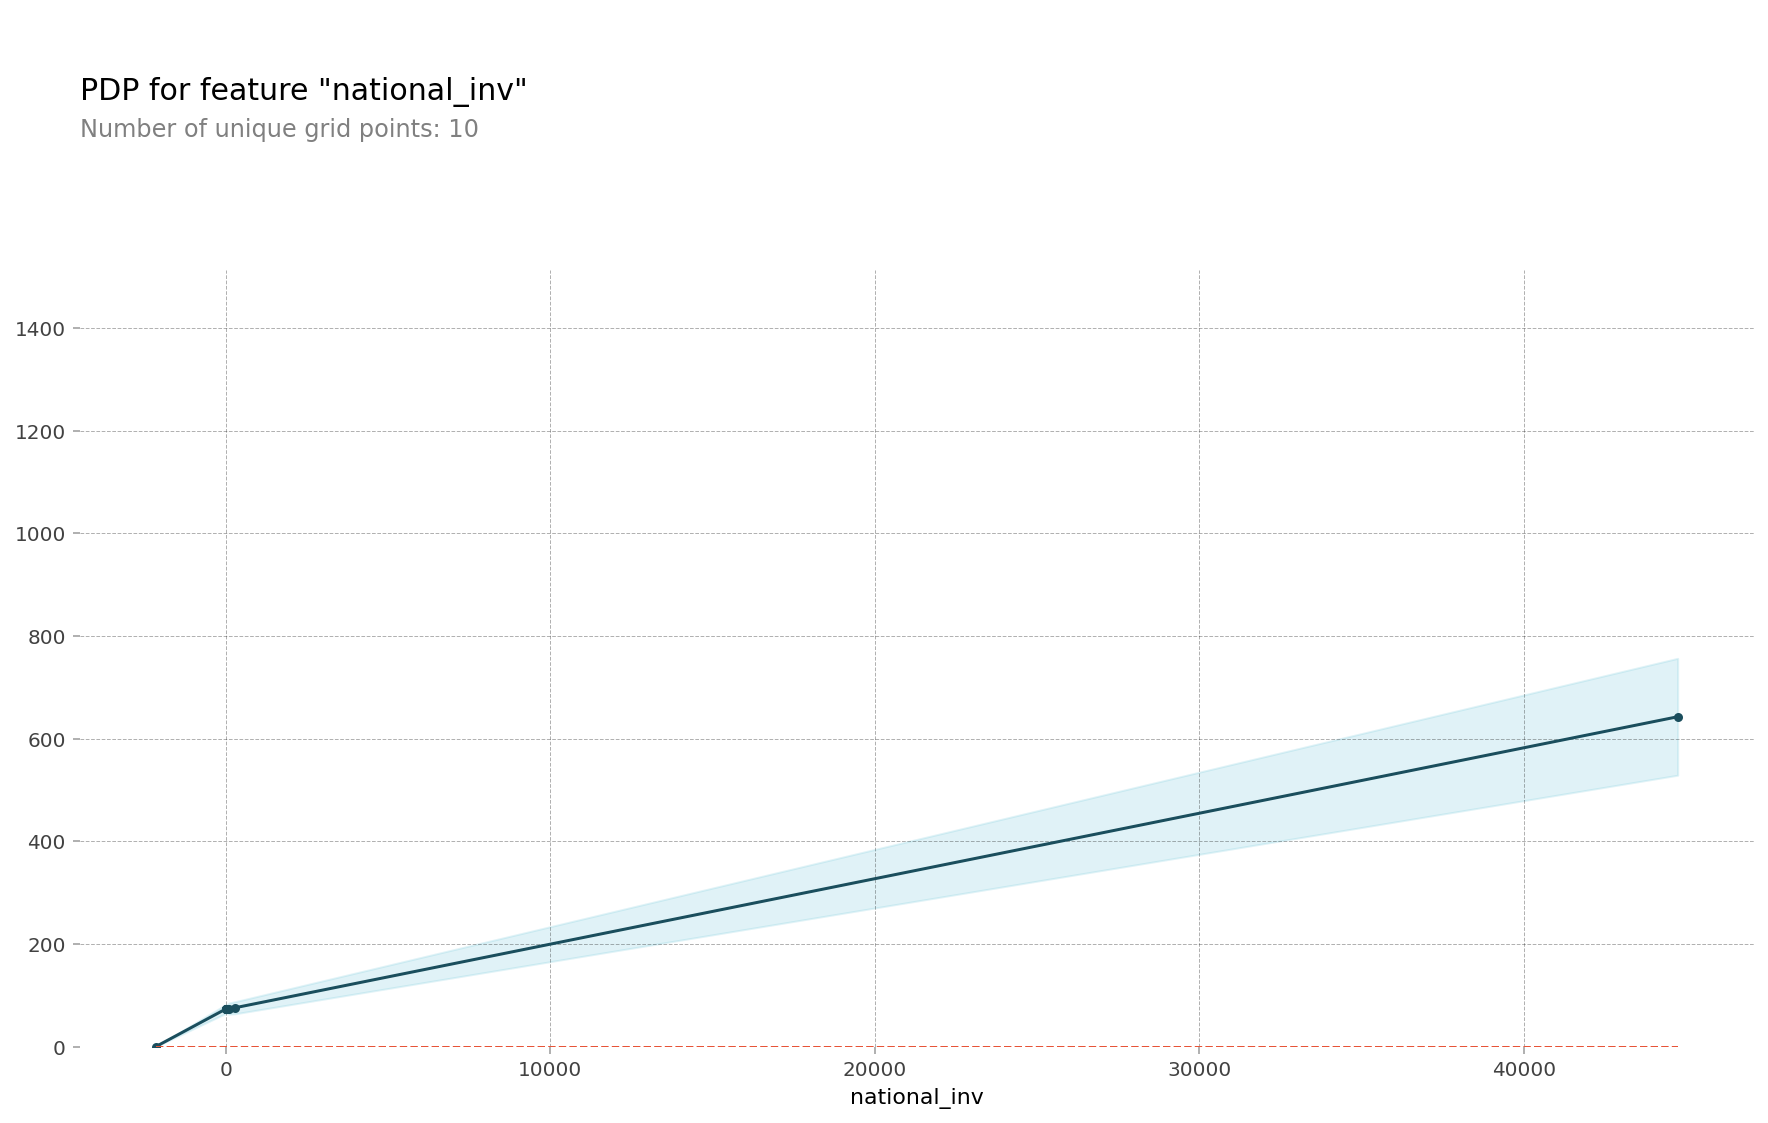

In [ ]:
target_feature = "national_inv"

isolated = pdp_isolate(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6c9939a8d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6c994f4c10>})

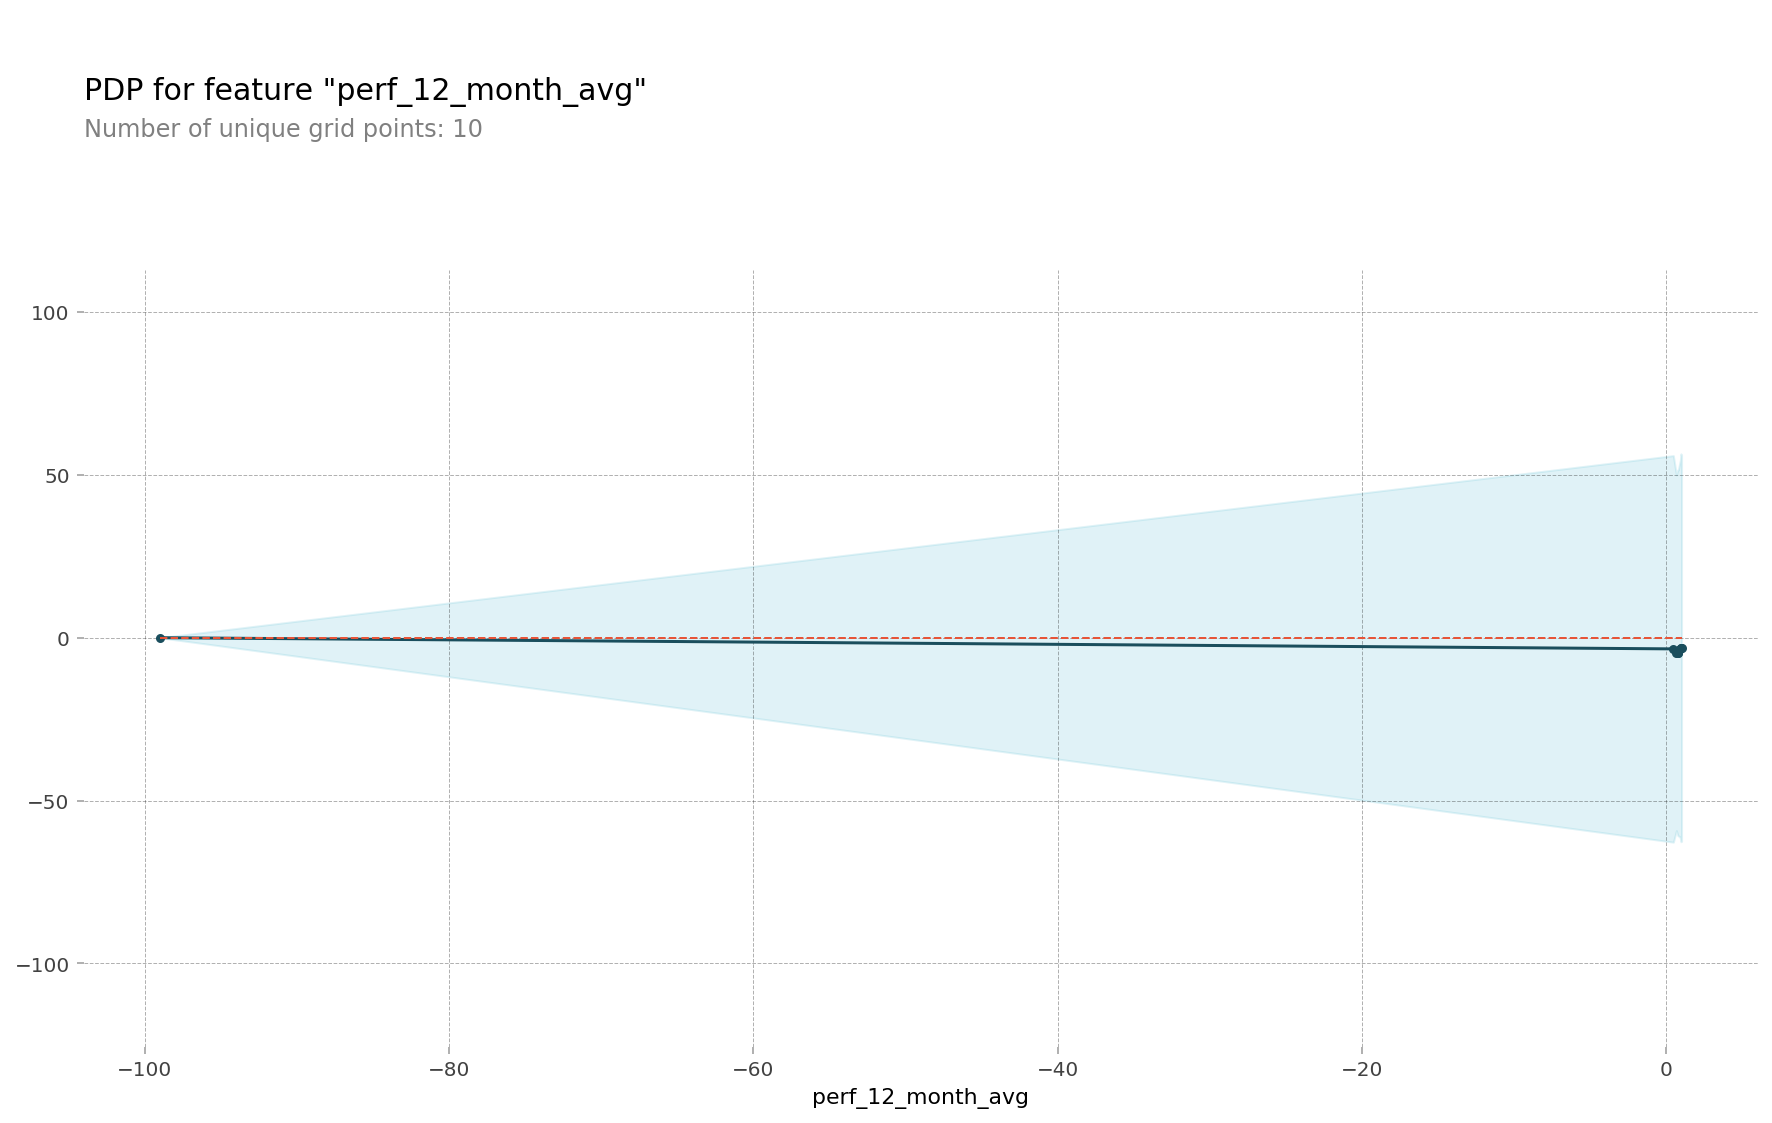

In [ ]:
target_feature = "perf_12_month_avg"

isolated = pdp_isolate(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5b7a73fd0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5b85d98d0>})

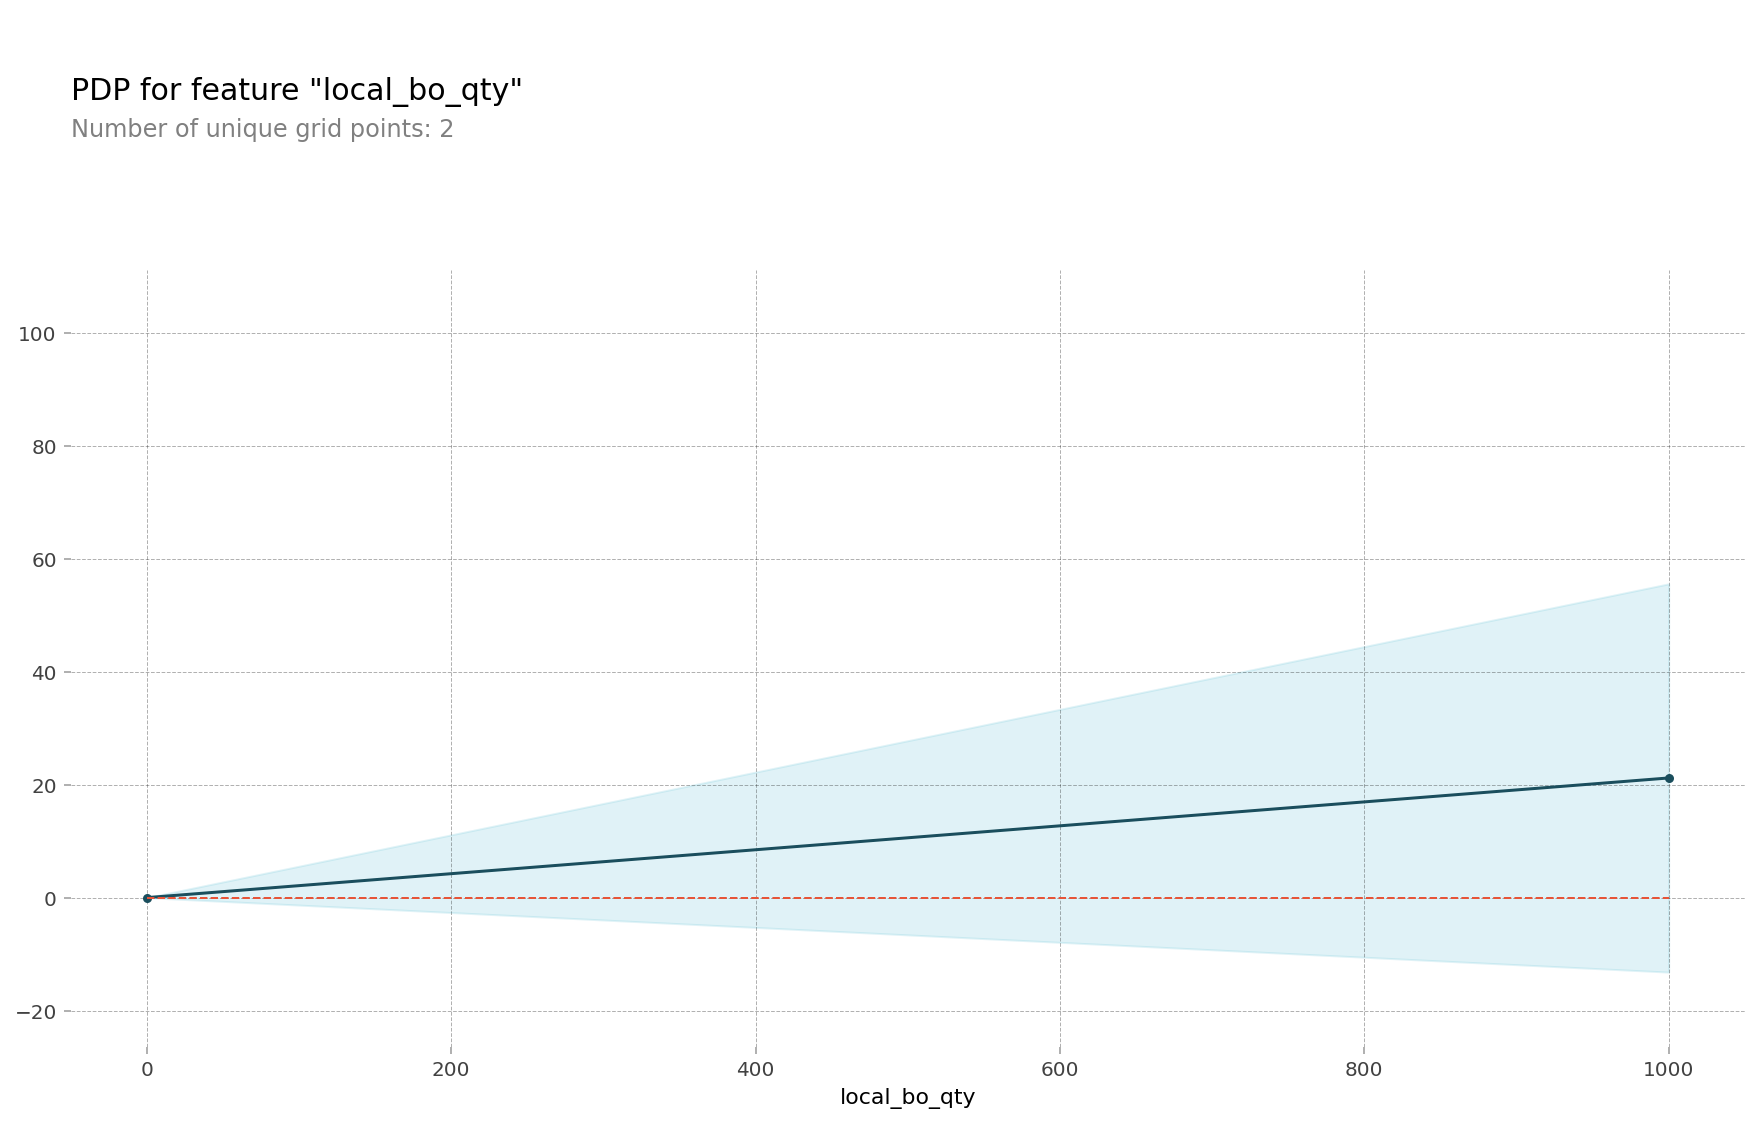

In [ ]:
target_feature = "local_bo_qty"

isolated = pdp_isolate(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 2160x1368 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5b57e5310>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fe5b57cb3d0>})

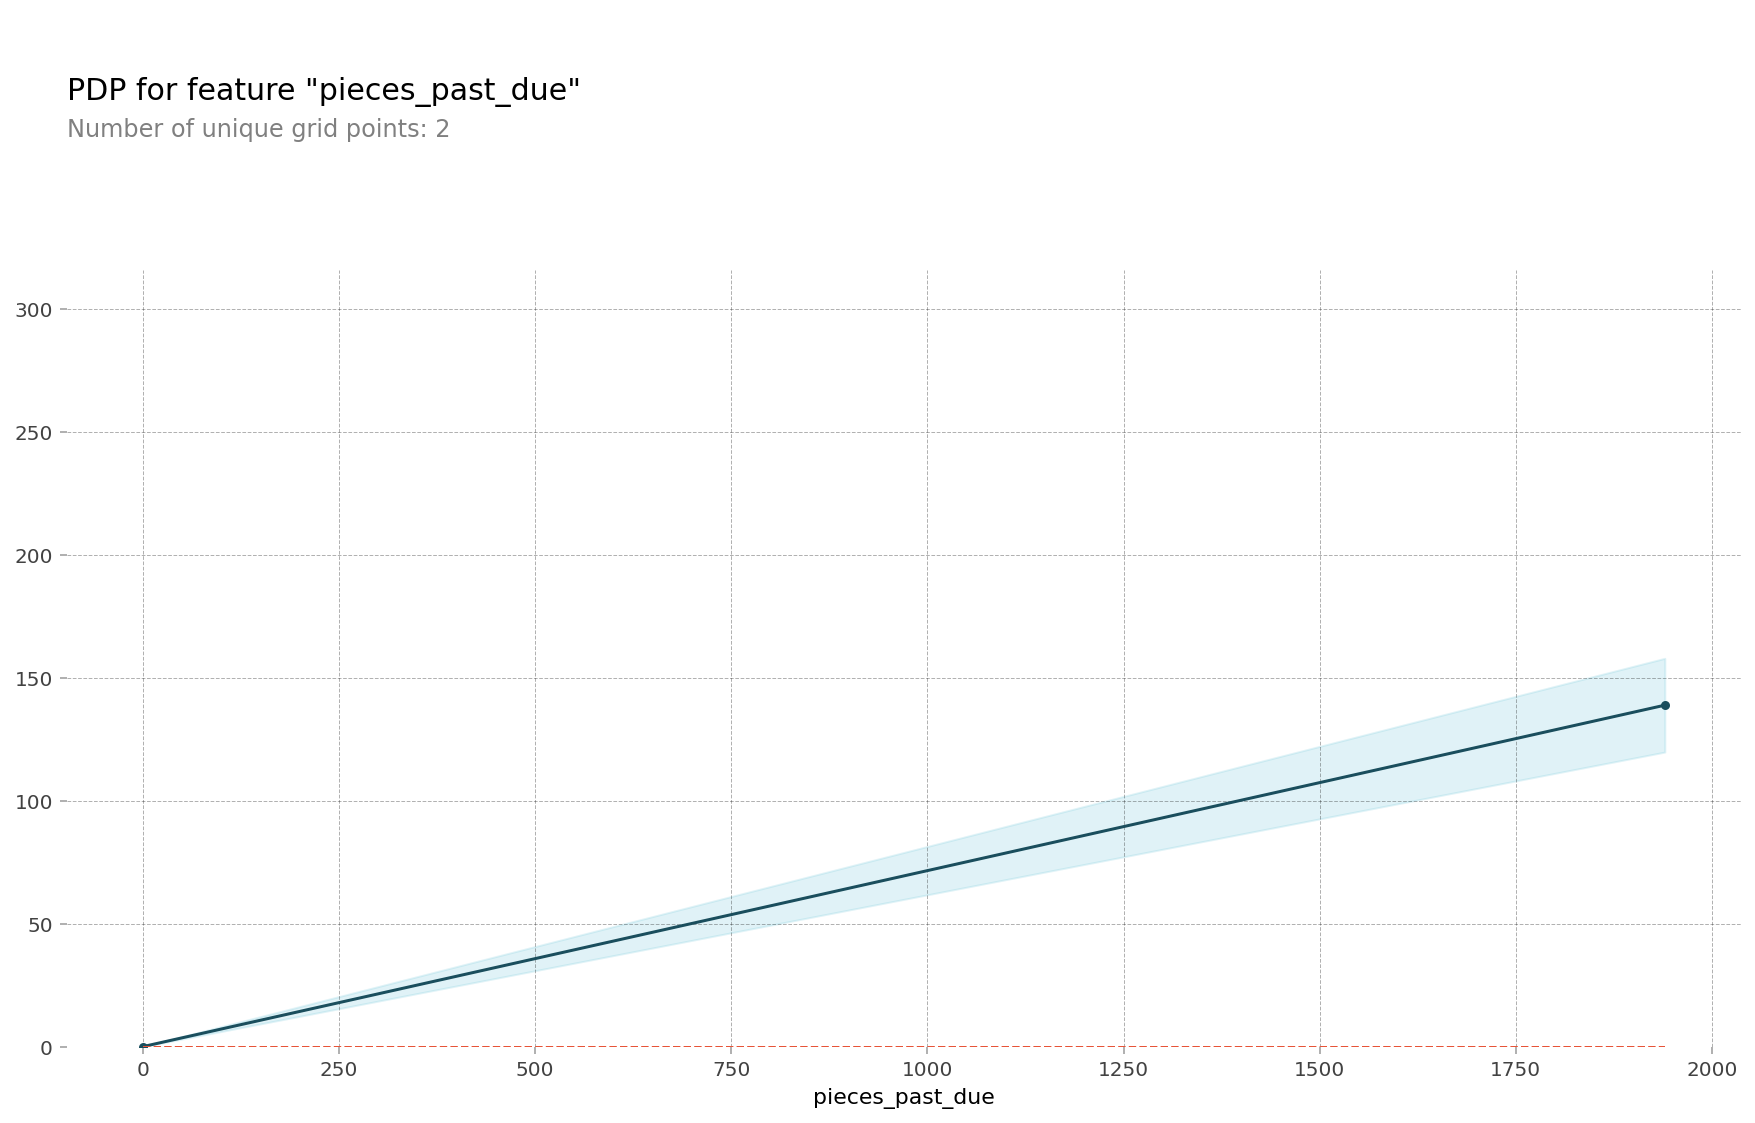

In [ ]:
target_feature = "pieces_past_due"

isolated = pdp_isolate(
    model=pipe,
    dataset=X_val,
    model_features=X_val.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)